Задание 1
На основании датасета для каждого покупателя получите:
•	предпочитаемый метод оплаты; 
•	общие траты;
•	количество денег, потраченных на дополнительные услуги и аксессуары. 

In [52]:
import pandas as pd
df = pd.read_csv("Electronic_sales_Sep2023-Sep2024.csv", sep=",")
df.head()

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56


In [53]:
# Предпочитаемый метод оплаты
groups = df.groupby('Customer ID')['Payment Method'].apply(lambda x: x.value_counts().idxmax())
groups.head()

Customer ID
1000    Credit Card
1002    Credit Card
1003           Cash
1004    Credit Card
1005         Paypal
Name: Payment Method, dtype: object

In [54]:
#   Предпочитаемый метод оплаты
#   Oбщие траты;
#   Количество денег, потраченных на дополнительные услуги и аксессуары. 
groups = df.groupby('Customer ID').agg(
    {
        "Total Price" : 'sum',
        "Add-on Total" : 'sum',
        "Payment Method" : lambda x: x.value_counts().idxmax(),
    }
)
groups.head()

,Total Price,Add-on Total,Payment Method
Customer ID,,,
1000,6279.42,66.30,Credit Card
1002,5020.60,60.16,Credit Card
1003,41.50,35.56,Cash
1004,83.00,65.78,Credit Card
1005,11779.11,75.33,Paypal


In [55]:
# доход по каждому методу доставки
groups_delivery = df.groupby('Shipping Type').agg({
    'Total Price' : 'sum'
})
groups_delivery

,Total Price
Shipping Type,
Expedited,12437526.21
Express,8685215.62
Overnight,8704828.17
Same Day,12432024.82
Standard,21343073.55


In [56]:
groups_products = df.groupby('Product Type').agg({
    'Total Price' : 'sum'
})
groups_products

,Total Price
Product Type,
Headphones,4041400.24
Laptop,12296239.97
Smartphone,21516754.69
Smartwatch,14036273.06
Tablet,11712000.41


In [46]:
# по дополнительным услугам за каждый месяц,

df['month'] = pd.to_datetime(df['Purchase Date']).dt.to_period('M')
group_month = df.groupby('month').agg({
    'Add-on Total': 'sum'
})
group_month

,Add-on Total
month,
2023-09,8012.62
2023-10,37837.12
2023-11,34888.81
2023-12,33509.15
2024-01,136195.16
2024-02,120148.92
2024-03,124954.26
2024-04,123973.59
2024-05,132018.51


In [57]:
df['Quarter'] = pd.to_datetime(df['Purchase Date']).dt.to_period('Q')
group_quarter = df.groupby('Quarter').agg({
    'Add-on Total': 'sum'
})
group_quarter

,Add-on Total
Quarter,
2023Q3,8012.62
2023Q4,106235.08
2024Q1,381298.34
2024Q2,382681.69
2024Q3,366669.23


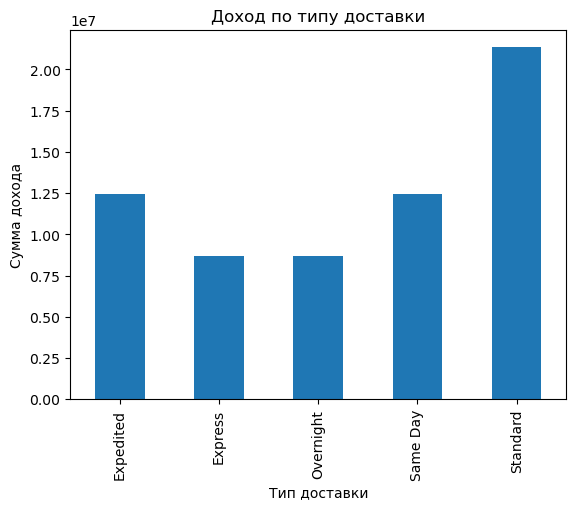

In [59]:
import matplotlib.pyplot as plt
groups_delivery.plot(
    kind='bar',                     # тип графика — столбиковый
    title='Доход по типу доставки', 
    ylabel='Сумма дохода', 
    xlabel='Тип доставки',
    legend=False
)
plt.show()

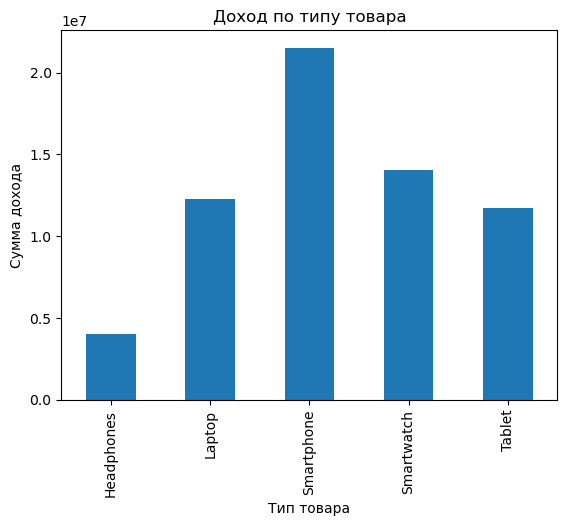

In [60]:
groups_products.plot(
    kind='bar',                     # тип графика — столбиковый
    title='Доход по типу товара', 
    ylabel='Сумма дохода', 
    xlabel='Тип товара',
    legend=False
)
plt.show()

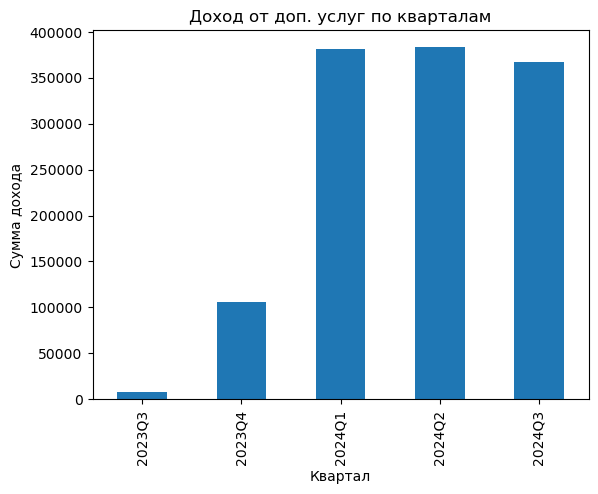

In [ ]:

# Визуализация 
group_quarter.plot(
    kind='bar',                     # тип графика — столбиковый
    title='Доход от доп. услуг по кварталам', 
    ylabel='Сумма дохода', 
    xlabel='Квартал',
    legend=False
)
plt.show()

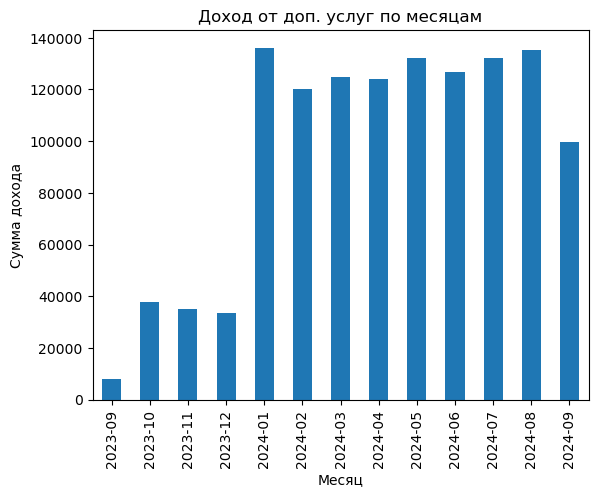

In [58]:
# Визуализация 
group_month.plot(
    kind='bar',                     # тип графика — столбиковый
    title='Доход от доп. услуг по месяцам', 
    ylabel='Сумма дохода', 
    xlabel='Месяц',
    legend=False
)
plt.show()